In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB39A')

# Check its architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

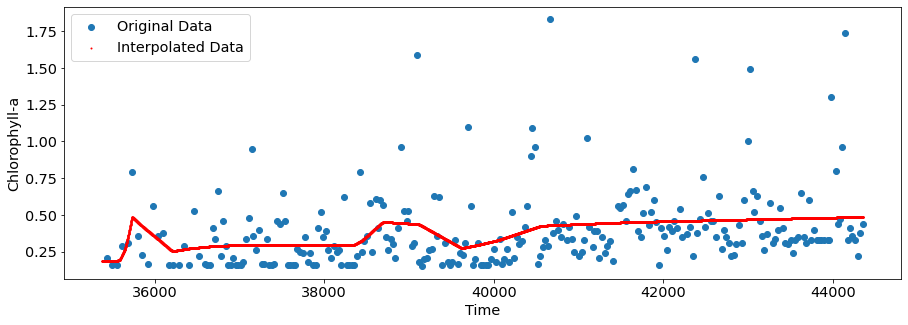

array([[0.02149721],
       [0.02184918],
       [0.02600794],
       [0.06806167],
       [0.15648407],
       [0.18923533],
       [0.16982996],
       [0.15231897],
       [0.1352026 ],
       [0.11808622],
       [0.10085011],
       [0.08297005],
       [0.06532168],
       [0.06436177],
       [0.06760486],
       [0.07108031],
       [0.07401119],
       [0.07601677],
       [0.07805525],
       [0.17699185],
       [0.18445398]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB39A.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.15
chlorophylla_max = 1.83
time_min = 35438.00 
time_max = 44356.47 

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
interpolation = model.predict([0.003363805
,0.009979288
,0.016819024
,0.023658761
,0.030498497
,0.037338234
,0.044290097
,0.05090558
,0.057745316
,0.064585053
,0.071424789
,0.078264526
,0.085216389
,0.091831872
,0.098671609
,0.105511345
,0.112351082
,0.119190818
,0.126142681
,0.672088206
,0.764256459
])
interpolation